<a href="https://colab.research.google.com/github/limited-fion/fspml-ee4/blob/main/FSPML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.1 Processing stock price data in Python


In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from google.colab import drive
import os
drive.mount('/content/drive')

!wget https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
font_files = fm.findSystemFonts()

# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)

# Use your new font on all your plots.
plt.rc('font', family='serif')

directory = '/content/drive/MyDrive/fspml/'

if not os.path.exists(directory):
  os.makedirs(directory)

Mounted at /content/drive
--2024-02-04 12:39:38--  https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5727 (5.6K) [text/plain]
Saving to: ‘Times New Roman.ttf’

Times New Roman.ttf 100%[===================>]   5.59K  --.-KB/s    in 0s      

2024-02-04 12:39:38 (66.0 MB/s) - ‘Times New Roman.ttf’ saved [5727/5727]



In [45]:
def graph_plot(ax, var, color = 'b', label=''):

    if isinstance(var, np.ndarray) or isinstance(var, list) :
        ax.plot(var, color = color)
    else:
        var.plot(ax = ax, color = color)


def graph_deco(ax, xlabel = '', ylabel = '', title = '', legend_on = True, display_names = []):

    # Set labels, title and ticks.
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Set legend on if it is required.
    if legend_on:
      if len(display_names) == 0:
          ax.legend()
      else :
          ax.legend(display_names, loc='upper left')
    elif ax.get_legend():
        # remove legend if present.
        ax.get_legend().remove()

def grid_minor():
    for ax in axes:
      ax.grid(which='major', color='gray', linestyle='-', linewidth=0.3)
      ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.3)
      ax.minorticks_on()  # Enable minor ticks

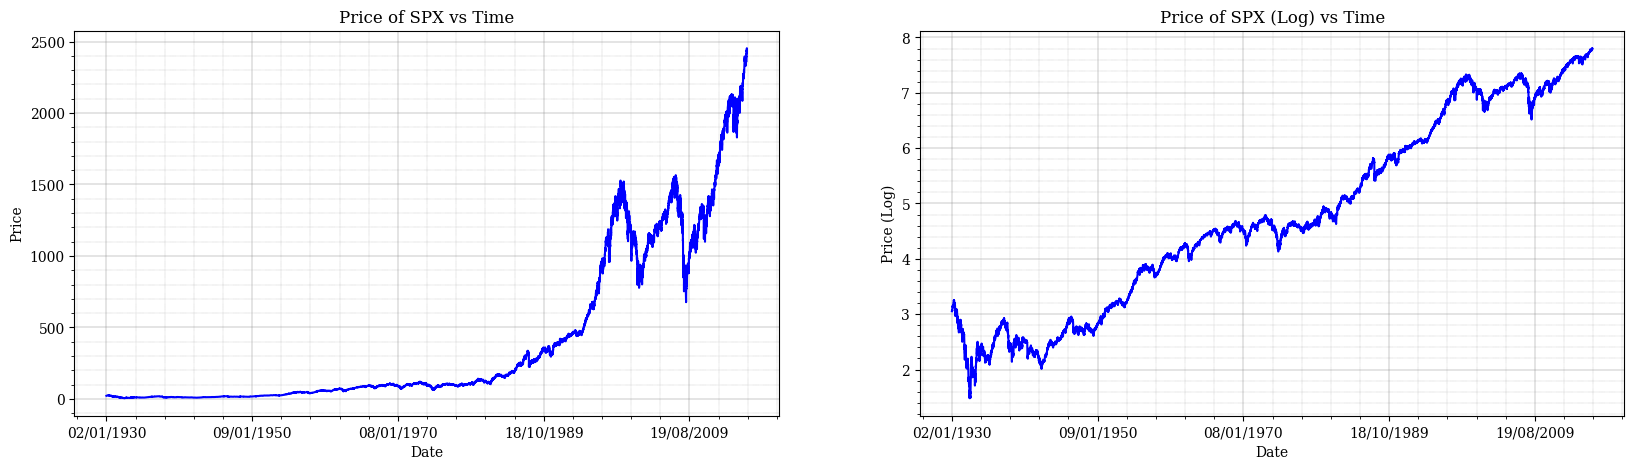

In [5]:
# 1.1.1
%matplotlib inline
px = pd.read_csv(os.path.join(directory, "priceData.csv"), index_col="date").dropna()

fig, axes = plt.subplots(1, 2, figsize=(20,5))
logpx = np.log(px)

graph_plot(axes[0], px)
graph_plot(axes[1], logpx)
graph_deco(axes[0], 'Date', 'Price', 'Price of SPX vs Time', legend_on=False)
graph_deco(axes[1], 'Date', 'Price (Log)', 'Price of SPX (Log) vs Time', legend_on=False)
grid_minor()

plt.savefig(os.path.join(directory, "1_1_1.svg"))

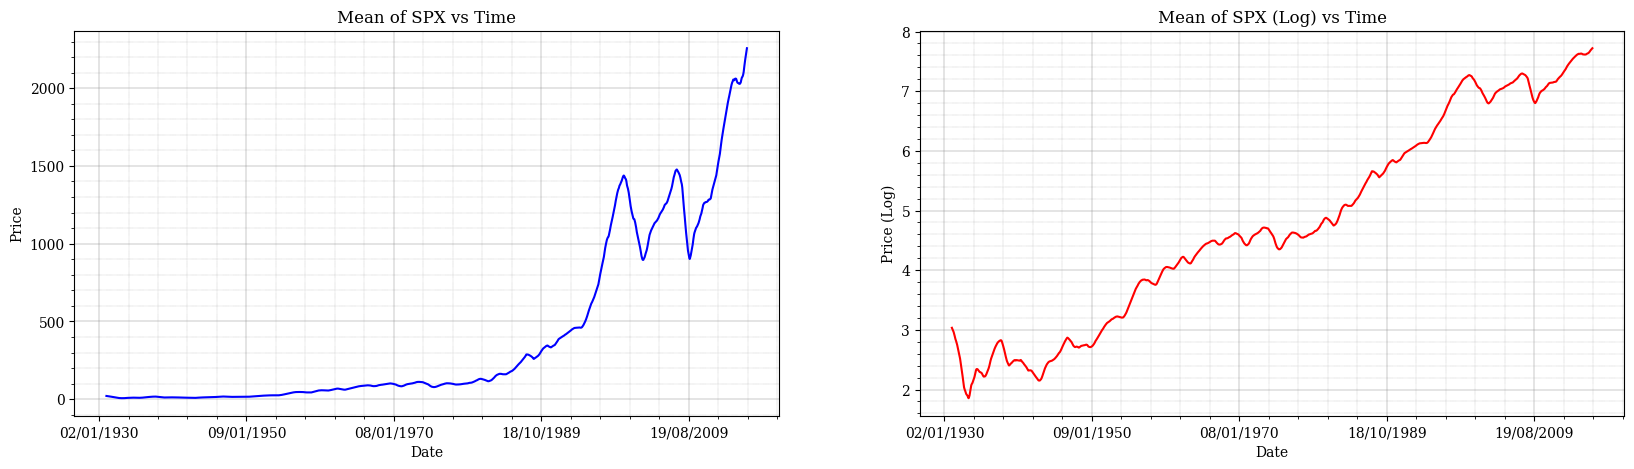

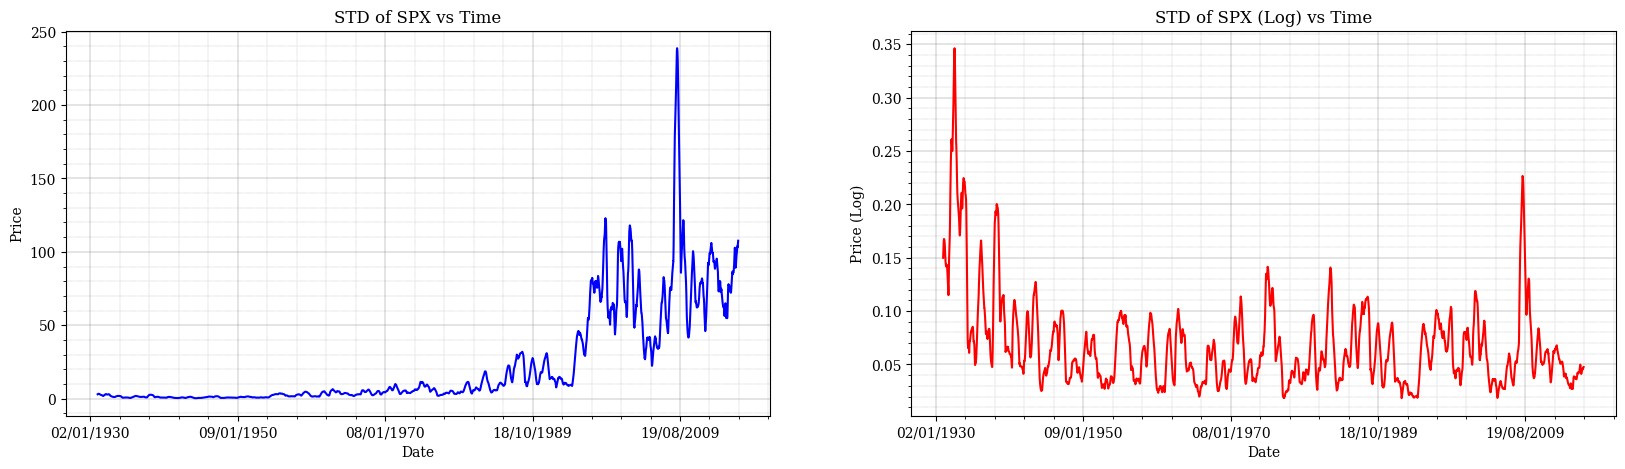

In [6]:
# 1.1.2
# sliding mean and sliding standard deviation (std)
fig, axes = plt.subplots(1, 2, figsize=(20,5))
graph_plot(axes[0], px.rolling(252).mean())
graph_plot(axes[1], logpx.rolling(252).mean(), color='r')
graph_deco(axes[0], 'Date', 'Price', 'Mean of SPX vs Time', legend_on=False)
graph_deco(axes[1], 'Date', 'Price (Log)', 'Mean of SPX (Log) vs Time', legend_on=False)
grid_minor()
plt.savefig(os.path.join(directory, "1_1_2_1.svg"))

fig, axes = plt.subplots(1, 2, figsize=(20,5))
graph_plot(axes[0], px.rolling(252).std())
graph_plot(axes[1], logpx.rolling(252).std(), color='r')
graph_deco(axes[0], 'Date', 'Price', 'STD of SPX vs Time', legend_on=False)
graph_deco(axes[1], 'Date', 'Price (Log)', 'STD of SPX (Log) vs Time', legend_on=False)
grid_minor()
plt.savefig(os.path.join(directory, "1_1_2_2.svg"))

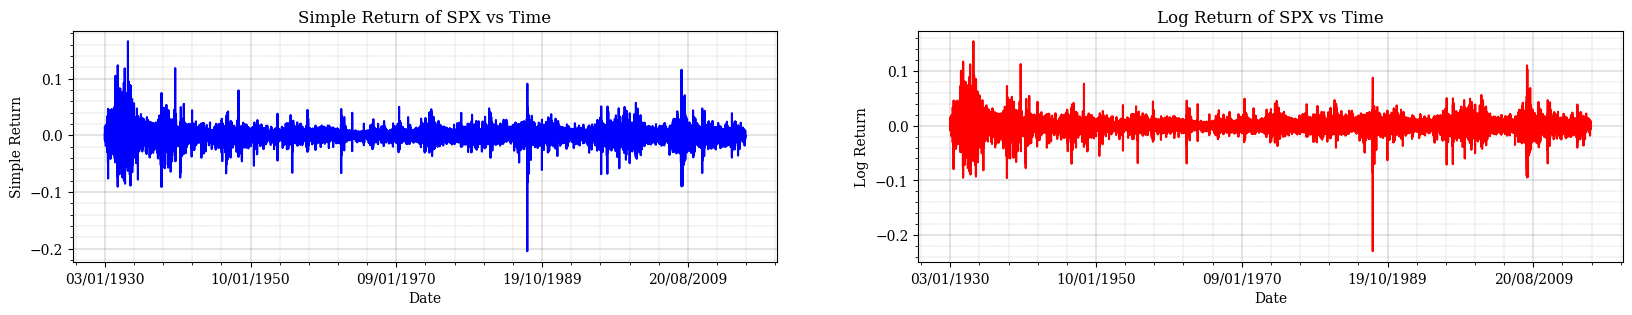

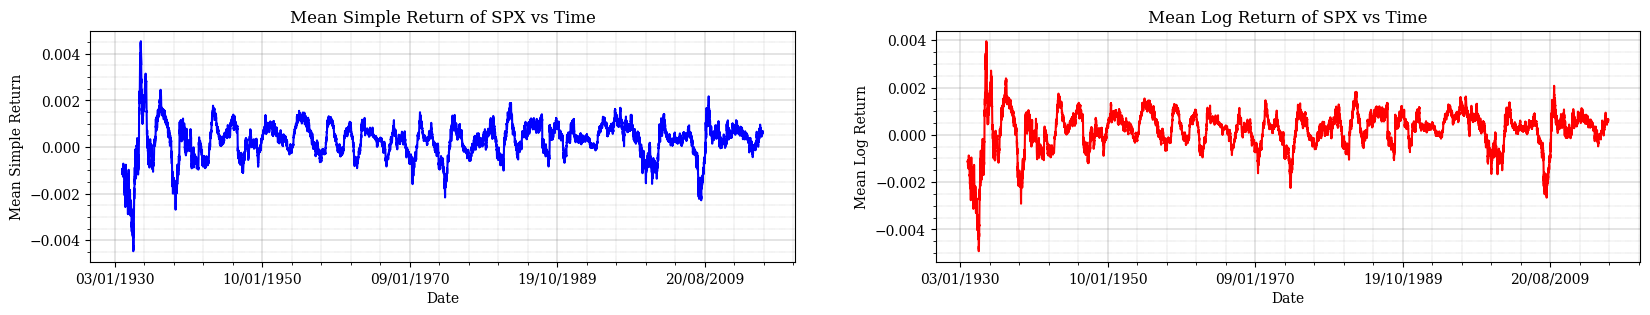

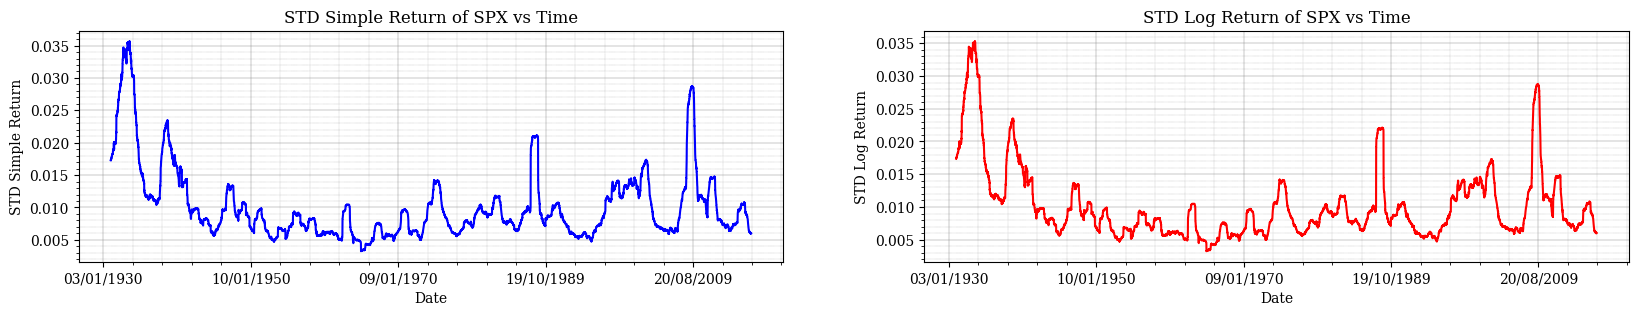

In [7]:
# log return
logret = logpx.diff().dropna()

# simple return
simpret = px.pct_change().dropna()

fig, axes = plt.subplots(1, 2, figsize=(20,3))
graph_plot(axes[0], simpret)
graph_plot(axes[1], logret, color='r')
graph_deco(axes[0], 'Date', 'Simple Return', 'Simple Return of SPX vs Time', legend_on=False)
graph_deco(axes[1], 'Date', 'Log Return', 'Log Return of SPX vs Time', legend_on=False)
grid_minor()
plt.savefig(os.path.join(directory, "1_1_3_1.svg"))

# sliding mean and std
fig, axes = plt.subplots(1, 2, figsize=(20,3))
graph_plot(axes[0], simpret.rolling(252).mean())
graph_plot(axes[1], logret.rolling(252).mean(), color='r')
graph_deco(axes[0], 'Date', 'Mean Simple Return', 'Mean Simple Return of SPX vs Time', legend_on=False)
graph_deco(axes[1], 'Date', 'Mean Log Return', 'Mean Log Return of SPX vs Time', legend_on=False)
grid_minor()
plt.savefig(os.path.join(directory, "1_1_3_2.svg"))


fig, axes = plt.subplots(1, 2, figsize=(20,3))
graph_plot(axes[0], simpret.rolling(252).std())
graph_plot(axes[1], logret.rolling(252).std(), color='r')
graph_deco(axes[0], 'Date', 'STD Simple Return', 'STD Simple Return of SPX vs Time', legend_on=False)
graph_deco(axes[1], 'Date', 'STD Log Return', 'STD Log Return of SPX vs Time', legend_on=False)
grid_minor()
plt.savefig(os.path.join(directory, "1_1_3_3.svg"))

In [ ]:
from statsmodels.tsa.stattools import adfuller

test_px = adfuller(px)
test_logpx = adfuller(logpx)
test_simpret = adfuller(simpret)
test_logret = adfuller(logret)

for test in [test_px, test_logpx, test_simpret, test_logret]:
    print(test[1])

1.0
0.9863263713847651
0.0
0.0


In [ ]:
from scipy import stats

# return the Jarque−Bera test p−value for a time−series x
print(stats.jarque_bera(simpret)[1])
print(stats.jarque_bera(logret)[1])

0.0
0.0


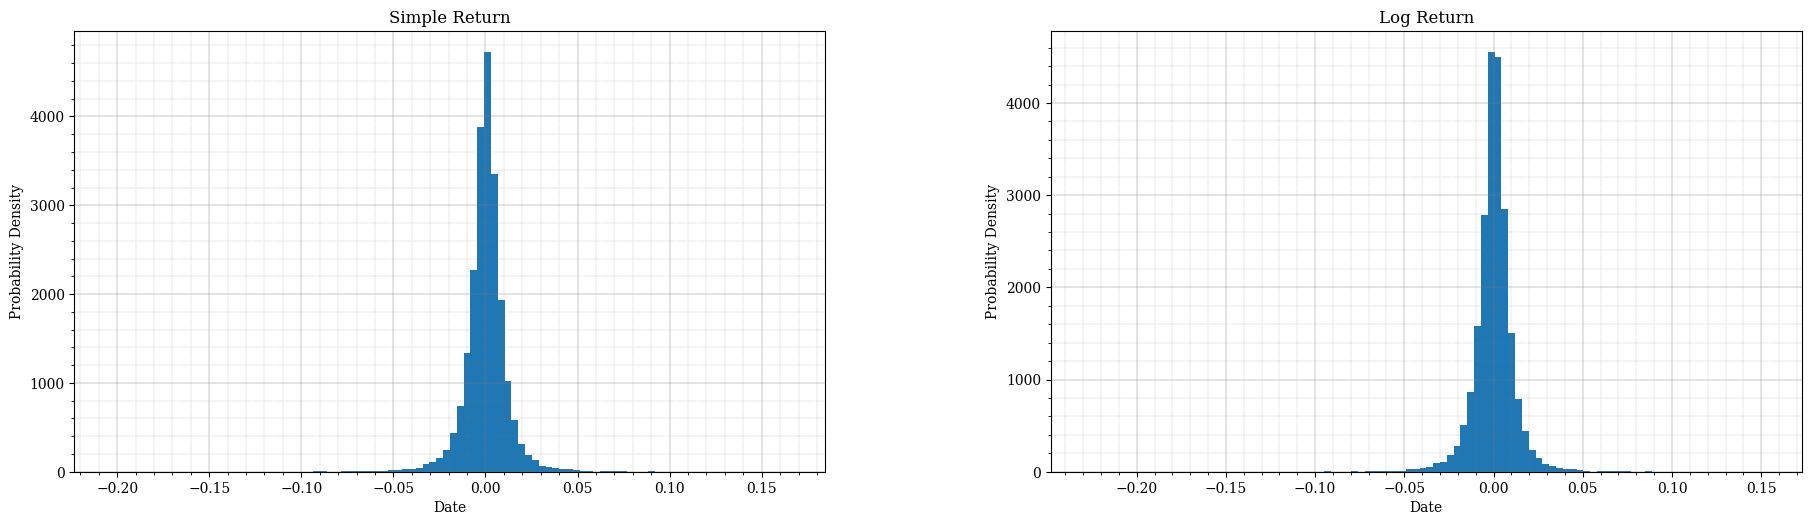

In [8]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
fig.tight_layout()

simpret.hist(ax=axes[0], bins=100)
logret.hist (ax=axes[1], bins=100)

graph_deco(axes[0], "Date", "Probability Density", 'Simple Return', legend_on = False)
graph_deco(axes[1], "Date", "Probability Density", 'Log Return', legend_on = False)

grid_minor()

plt.savefig(os.path.join(directory, "1_1_4.svg"))

## 1.2 ARMA vs ARIMA Models for Financial Applications

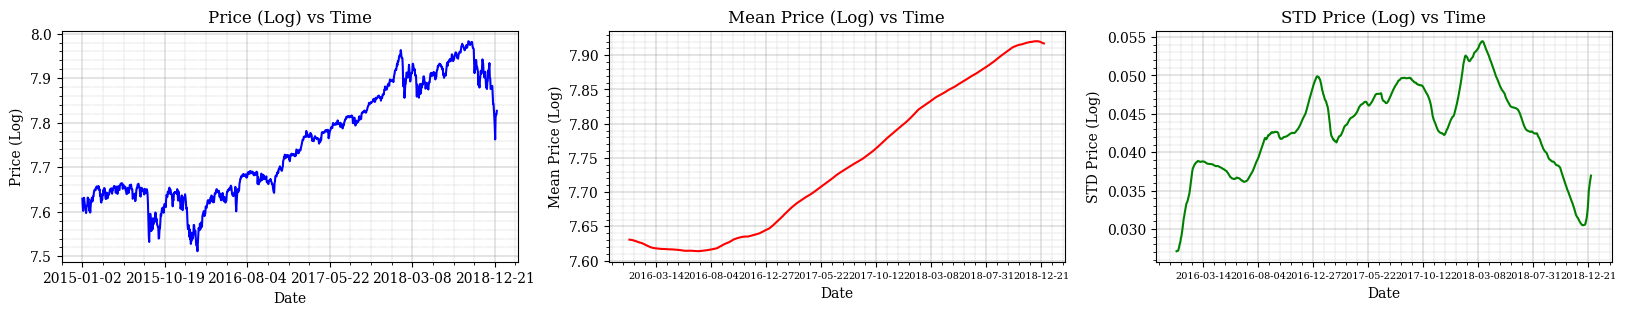

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import copy

# 1.2.1
snp = pd.read_csv(os.path.join(directory, 'snp_500_2015_2019.csv'), index_col='Date')
snp_close = snp['Close'].to_frame().apply(np.log)


fig, axes = plt.subplots(1, 3, figsize=(20,3))
graph_plot(axes[0], snp_close)
graph_plot(axes[1], snp_close.rolling(252).mean(), color='r')
graph_plot(axes[2], snp_close.rolling(252).std(), color='g')

graph_deco(axes[0], 'Date', 'Price (Log)', 'Price (Log) vs Time', legend_on=False)
graph_deco(axes[1], 'Date', 'Mean Price (Log)', 'Mean Price (Log) vs Time', legend_on=False)
graph_deco(axes[2], 'Date', 'STD Price (Log)', 'STD Price (Log) vs Time', legend_on=False)
axes[1].tick_params(axis='x', labelsize=7)
axes[2].tick_params(axis='x', labelsize=7)
grid_minor()
plt.savefig(os.path.join(directory, "1_2_1.svg"))


In [57]:
# 1.2.2
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
# model summary
print(ARIMA(snp_arma['True'], order=(1,0,0)).fit().summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   True   No. Observations:                 1006
Model:                 ARIMA(1, 0, 0)   Log Likelihood                3352.696
Date:                Sun, 04 Feb 2024   AIC                          -6699.392
Time:                        13:30:22   BIC                          -6684.651
Sample:                             0   HQIC                         -6693.791
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7489      0.079     98.290      0.000       7.594       7.903
ar.L1          0.9974      0.002    520.016      0.000       0.994       1.001
sigma2      7.422e-05   1.99e-06     37.368      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


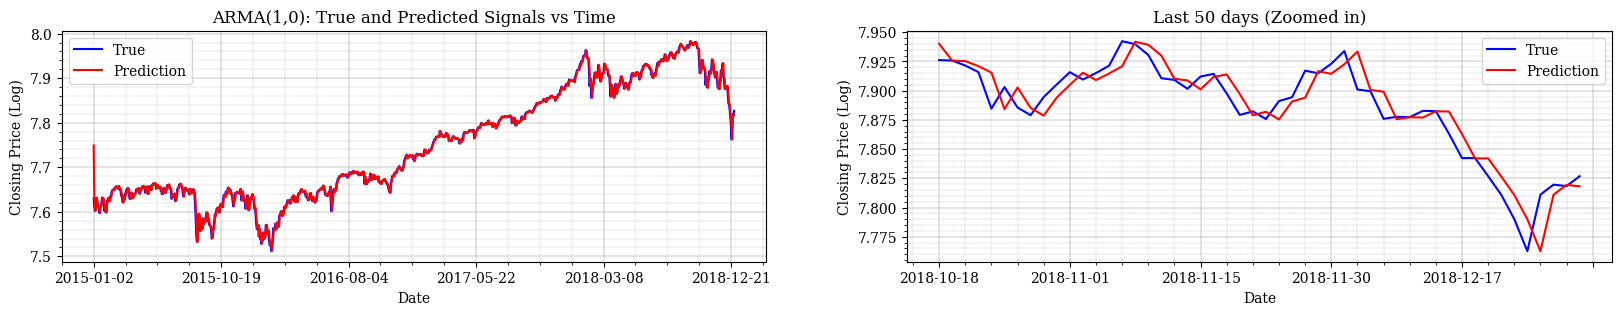

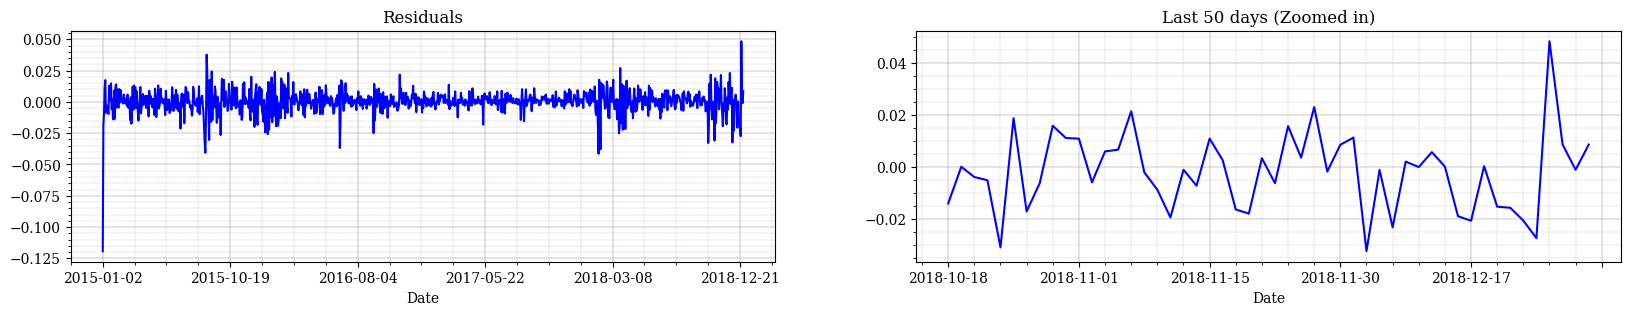

In [58]:
model = ARIMA(snp_arma['True'], order=(1,0,0))
snp_arma['Res'] = model.fit().resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']


fig1, axes = plt.subplots(1, 2, figsize=(20,3))
graph_plot(axes[0], snp_arma[['True', 'Prediction']], label = ['True', 'Prediction'], color=['b','r'])
graph_plot(axes[1], snp_arma[['True', 'Prediction']][-50:], label = ['True', 'Prediction'], color=['b','r'])
graph_deco(axes[0], 'Date', 'Closing Price (Log)', 'ARMA(1,0): True and Predicted Signals vs Time')
graph_deco(axes[1], 'Date', 'Closing Price (Log)', 'Last 50 days (Zoomed in)')
grid_minor()
plt.savefig(os.path.join(directory, "1_2_2_1.svg"))



fig2, axes = plt.subplots(1, 2, figsize=(20,3))
graph_plot(axes[0], snp_arma['Res'])
graph_plot(axes[1], snp_arma['Res'][-50:])
graph_deco(axes[0], 'Date', '', 'Residuals', legend_on=False)
graph_deco(axes[1], 'Date', '', 'Last 50 days (Zoomed in)', legend_on=False)
grid_minor()
plt.savefig(os.path.join(directory, "1_2_2_2.svg"))



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   True   No. Observations:                 1006
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3351.284
Date:                Sun, 04 Feb 2024   AIC                          -6698.568
Time:                        13:36:22   BIC                          -6688.743
Sample:                             0   HQIC                         -6694.835
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0082      0.019     -0.426      0.670      -0.046       0.029
sigma2      7.424e-05   1.93e-06     38.401      0.000    7.04e-05     7.8e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


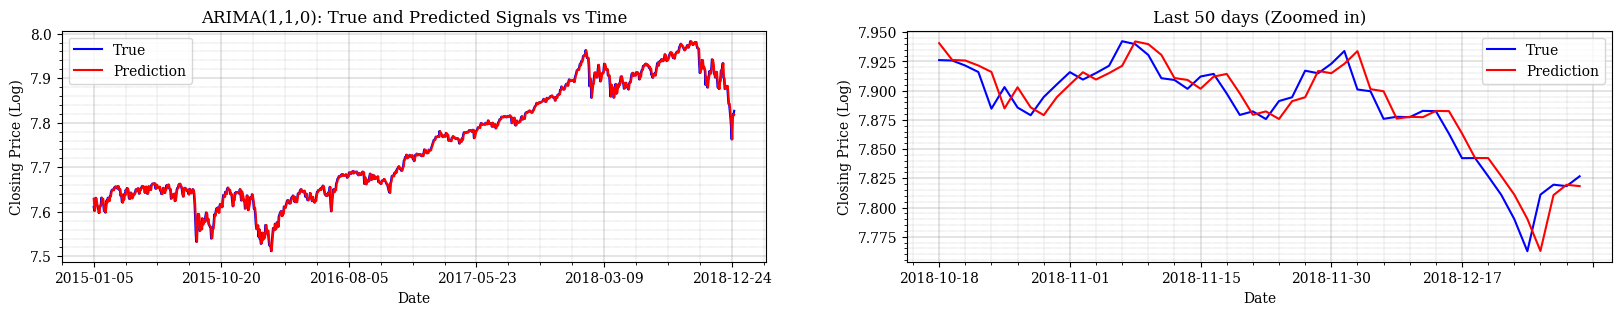

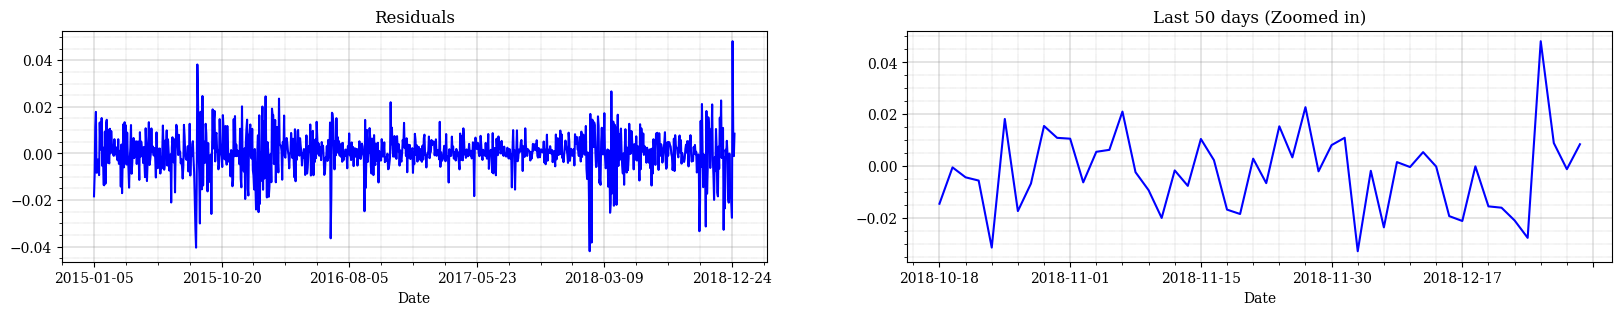

In [63]:
# 1.2.3
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']

print(ARIMA(snp_arima['True'], order=(1,1,0)).fit().summary())

model2 = ARIMA(snp_arima['True'], order=(1,1,0))
snp_arima['Res'] = model2.fit().resid
snp_arima['Prediction'] = snp_arima['True'] - snp_arima['Res']


fig1, axes = plt.subplots(1, 2, figsize=(20,3))
graph_plot(axes[0], snp_arima[['True', 'Prediction']][1:], label = ['True', 'Prediction'], color=['b','r'])
graph_plot(axes[1], snp_arima[['True', 'Prediction']][-50:], label = ['True', 'Prediction'], color=['b','r'])
graph_deco(axes[0], 'Date', 'Closing Price (Log)', 'ARIMA(1,1,0): True and Predicted Signals vs Time')
graph_deco(axes[1], 'Date', 'Closing Price (Log)', 'Last 50 days (Zoomed in)')
grid_minor()
plt.savefig(os.path.join(directory, "1_2_3_1.svg"))

fig2, axes = plt.subplots(1, 2, figsize=(20,3))
graph_plot(axes[0], snp_arima['Res'][1:])
graph_plot(axes[1], snp_arima['Res'][-50:])
graph_deco(axes[0], 'Date', '', 'Residuals', legend_on=False)
graph_deco(axes[1], 'Date', '', 'Last 50 days (Zoomed in)', legend_on=False)
grid_minor()
plt.savefig(os.path.join(directory, "1_2_3_2.svg"))


## 1.3 VAR Models


In [ ]:
# 1.3.4

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR
df = pd.read_csv(os.path.join(directory, 'snp_500_2015_2019.csv'), index_col='Date')
info = pd.read_csv(r'snp_info.csv')
info.drop(columns=info.columns[0], inplace=True)

tickers = ['CAG' , 'MAR' , 'LIN' , 'HCP' , 'MAT']
stocks = df[tickers]
stocks_ma = stocks.rolling(window=66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()

stocks_detrended.plot(figsize=(10,5), title="Closing Prices of Detrended Stocks", ylabel="Closing Price")

model = VAR(stocks_detrended)
results = model.fit(1)
A_Mat = results.params[1:].values
eigA, _ = np.linalg.eig(A_Mat)
print(abs(eigA))

print(np.matmul(A_Mat,stocks_detrended.iloc[-1]))

curr = stocks_detrended.iloc[-1]

for i in range(10):
    next = np.matmul(A_Mat, curr)
    print(curr)
    curr = next


In [ ]:
# 1.3.5

eig_analysis = pd.DataFrame(columns=["Min", "Max"], index=info['GICS Sector'].unique())

for sector in info['GICS Sector'].unique():
    tickers = info.loc[info['GICS Sector']==sector]['Symbol'].tolist()
    stocks = df[tickers]
    stocks_ma = stocks.rolling(window=66).mean()
    stocks_detrended = stocks.sub(stocks_ma).dropna()
    model = VAR(stocks_detrended)
    results = model.fit(1)
    A_Mat = results.params[1:].values
    eigA, _ = np.linalg.eig(A_Mat)
    eig_analysis.at[sector, "Min"] = abs(np.min(eigA))
    eig_analysis.at[sector, "Max"] = abs(np.max(eigA))

display(eig_analysis)